# **1.** 데이터 불러오기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

url = '/content/drive/MyDrive/project1/vgames2.csv'
df = pd.read_csv(url, encoding='utf-8', index_col=0)
pd.set_option('display.max_columns', None)
pd.set_option('max_rows',None)

In [4]:
new_header = ('게임제목','플랫폼','판매연도','장르','개발사','북미출고량','유럽출고량','일본출고량','기타출고량')
df.columns = new_header

In [5]:
df.head()

,게임제목,플랫폼,판매연도,장르,개발사,북미출고량,유럽출고량,일본출고량,기타출고량
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# **2**-1. 결측지 제거

In [6]:
#모든 결측치는 신뢰 할 수 없는 내용으로 간주하여 제거합니다.
df.isnull().sum()


게임제목       0
플랫폼        0
판매연도     271
장르        50
개발사       58
북미출고량      0
유럽출고량      0
일본출고량      0
기타출고량      0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

게임제목     0
플랫폼      0
판매연도     0
장르       0
개발사      0
북미출고량    0
유럽출고량    0
일본출고량    0
기타출고량    0
dtype: int64

# **2**-2. 출고량 단위 전처리(Million 형태의 실수로 변환)

In [8]:
df.dtypes
# 출고량이 문자열 형태이며 실제 데이터를 확인하니 K, M 등의 단위들도 섞여있어서 M의 단위로 전처리를 결정

게임제목      object
플랫폼       object
판매연도     float64
장르        object
개발사       object
북미출고량     object
유럽출고량     object
일본출고량     object
기타출고량     object
dtype: object

In [9]:
df_tr = df.iloc[:,5:]
df_tr.head()

,북미출고량,유럽출고량,일본출고량,기타출고량
1,0.04,0,0,0
2,0.17,0,0,0.01
3,0,0,0.02,0
4,0.04,0,0,0
5,0.12,0.09,0,0.04


In [10]:
# 전처리 출고량 수치 통일 K,와 M 제거
def kreplace(string):
  return string.replace('K','000')

def mreplace(string):
  return string.replace('M','')

col = df_tr.columns
for idx in col :
  for i in df_tr[idx]:
    if i.endswith('K') :
      df_tr[idx] = df_tr[idx].apply(kreplace)
    elif i.endswith('M'):
      df_tr[idx] = df_tr[idx].apply(mreplace)
    else :
     continue

In [11]:
df_tr.dtypes

북미출고량    object
유럽출고량    object
일본출고량    object
기타출고량    object
dtype: object

In [12]:
# 형변환

df_tr = df_tr.astype({'북미출고량':'float','유럽출고량':'float','일본출고량':'float','기타출고량':'float'})

In [13]:
df_tr[df_tr >100] = df_tr[df_tr > 1000].apply(lambda x : (x/1000000))#와!와!와!와!와!와!

In [14]:
df.iloc[:,5:] = df_tr

# **2**-3. 출시년도 전처리

**이상한 형태의 실제 년도를 찾기위해 몇가지 정리하여 게임 출시년도를 확인해 보았다.**

**Sugoi Hebereke - 94.0 --->> 1994년도 출시**(출처 : https://en.wikipedia.org/wiki/Sugoi_Hebereke)

**Imagine: Ballet Star - 8.0 --->> 2008년도 출시**(출처 : https://nintendo.fandom.com/wiki/Imagine:_Ballet_Star)

**[[ 예 외 ]]**

**Strider 2	- 0.0 --->> 1990년도 출시**(출처 : https://en.wikipedia.org/wiki/Strider_2)


**Point Blank 3 - 0.0 --->> 2000년도 출시**(출처 :구글 Point Blank 3 최초출시일 검색)


**Trade & Battle: Card Hero - 0.0 --->> 2000년도 출시**(출처 : https://en.wikipedia.org/wiki/Trade_%26_Battle:_Card_Hero)




**정리하자면**

**일, 십의 자리 = 2000년도 대 출시**

**80, 90의 자리 = 1900년도 대 출시**

와 같은 근거가 된다.



In [15]:
#판매년도를 살펴보니 아래와 같이 연도 표기가 제대로 안되어 있다.
df[df['판매연도'] <1000]

,게임제목,플랫폼,판매연도,장르,개발사,북미출고량,유럽출고량,일본출고량,기타출고량
75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
214,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.00,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00,0.00
769,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
907,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96.0,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00
1016,Wolfenstein,PC,9.0,Shooter,Activision,0.01,0.03,0.00,0.01
1221,Ratchet & Clank: Going Commando,PS2,3.0,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1365,LEGO Star Wars II: The Original Trilogy,PS2,6.0,Action,LucasArts,1.85,0.64,0.01,0.19
1410,Rogue Warrior,PS3,9.0,Shooter,Bethesda Softworks,0.11,0.02,0.00,0.01


In [16]:
df.dtypes
# 실수형 확인

게임제목      object
플랫폼       object
판매연도     float64
장르        object
개발사       object
북미출고량    float64
유럽출고량    float64
일본출고량    float64
기타출고량    float64
dtype: object

In [17]:
df_year = df['판매연도']
# 0인값 처리
df_year.at[9277] = 2000
df_year.at[14667] = 1990
df_year.at[16395] = 2000
df_year[(df_year<20)] += 2000
df_year[(df_year < 100)] += 1900



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
df_year = df_year.astype('int')
df_year = df_year.astype('str')

In [19]:
df_year.head()

1    2008
2    2009
3    2010
4    2010
5    2010
Name: 판매연도, dtype: object

In [20]:
df['판매연도'] = df_year

In [21]:
df.head()

,게임제목,플랫폼,판매연도,장르,개발사,북미출고량,유럽출고량,일본출고량,기타출고량
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


# **3**-1. 지역별 선호하는 게임 장르는 같을까?

In [22]:
#지역별 선호하는 게임 장르
df_genre = df.groupby(df['장르'],as_index=['북미출고량','유럽출고량','일본출고량','기타출고량']).sum()

In [23]:
df_genre.head()

,북미출고량,유럽출고량,일본출고량,기타출고량
장르,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45


In [24]:
import matplotlib.pyplot as plt

df_genre_p = df_genre.reset_index()

In [25]:

df_genre

,북미출고량,유럽출고량,일본출고량,기타출고량
장르,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [26]:
df_genre_p

,장르,북미출고량,유럽출고량,일본출고량,기타출고량
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


# **3**-2. 그룹 막대 그래프 그리기

In [27]:
import seaborn as sns
import numpy as np
%matplotlib inline 
def draw_group_barchart(df,main_category,sub_category,fig_width=10,fig_height=10, \
                        bar_type='vertical', between_bar_padding=0.85,\
                        within_bar_padding=0.8, config_bar=None):
    '''
    Description :
    그룹바 차트를 그려주는 함수다. 
    
    Arguments :
    df = 메인 카테고리와 서브 카테고리로 이루어진 데이터, pd.DataFrame 객체여야 한다.
    main_category = 메인 카테고리 변수를 나타내는 문자열
    sub_category = 서브 카테고리 변수를 모아 놓은 리스트
    fig_width = 캔버스 폭
    fig_height = 캔버스 높이
    bar_type = 'vertical' 또는 'horizontal'값을 가질 수 있으며
               'vertical'은 수직 바 차트를 'horizontal'은 수평 바 차트를 그린다.
    between_bar_padding = 메인 카테고리 간 여백 조절 0~1사이의 값을 갖는다.
    within_bar_padding = 메인 카테고리 내 여백 조절 0~1사이의 값을 갖는다. 
    config_bar = 바 차트를 꾸미기 위한 옵션. 딕셔너리 형태로 넣어줘야 한다.
    
    Return : 
    그룹바 차트 출력
    '''
    
    ## Arguments 체크
    if not isinstance(main_category,str):
        print(f'main_category인자의 타입은 {type(main_category)}가 아니고 문자열 입니다.')
        return
    if not main_category in df.columns:
        print(f'데이터가 {main_category} 칼럼을 포함하고 있지 않습니다.')
        return
    if not set(sub_category).issubset(set(df.columns)):
        print(f'{set(sub_category)-set(df.columns)}가 데이터에 없습니다.')
        return
    if isinstance(bar_type,str):
        if not bar_type in ['vertical','horizontal']:
            print(f'bar_type인자에는 "vertical"과 "horizontal"만 허용됩니다.')
            return
    else:
        print(f'bar_type인자의 타입은 {type(bar_type)}가 아니고 문자열 입니다.')
        return
    
    if between_bar_padding < 0 or between_bar_padding > 1:
        print(f'between_bar_padding은 0보다 크거나 같고, 1보다 작거나 같아야합니다.')
        return
    if within_bar_padding < 0 or within_bar_padding > 1:
        print(f'within_bar_padding은 0보다 크거나 같고, 1보다 작거나 같아야합니다.')
        return
    
    ## 필요 모듈 임포트
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    %matplotlib inline 
 
    num_sub_category = len(sub_category) ## 서브 카테고리 개수
 
    fig = plt.figure(figsize=(fig_width,fig_height)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 지정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성
    
    colors = sns.color_palette('hls',num_sub_category) ## 막대기 색상 지정
    
    tick_label = list(df[main_category].unique()) ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    
    tick_coord = np.arange(tick_number) ## 메인 카테고리안에서 첫번째 서브 카테고리 막대기가 그려지는 x좌표
 
    width = 1/num_sub_category*between_bar_padding ## 막대기 폭 지정
 
    config_tick = dict()
    config_tick['ticks'] = [t + width*(num_sub_category-1)/2 for t in tick_coord] ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label 
 
    if bar_type == 'vertical': ## 수직 바 차트를 그린다.
        plt.xticks(**config_tick) ## x축 눈금 라벨 생성
 
        for i in range(num_sub_category):
            if config_bar: ## 바 차트 추가 옵션이 있는 경우
                ax.bar(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                       color=colors[i], **config_bar) ## 수직 바 차트 생성
            else:
                ax.bar(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                       color=colors[i]) ## 수직 바 차트 생성
        plt.legend() ## 범례 생성
        plt.savefig('fig03.png',format='png',dpi=300)
        plt.show()
    else: ## 수평 바 차트를 그린다.
        plt.yticks(**config_tick) ## x축 눈금 라벨 생성
 
        for i in range(num_sub_category):
            if config_bar: # 바 차트 추가 옵션이 있는 경우
                ax.barh(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                        color=colors[i], **config_bar) ## 수평 바 차트 생성
            else:
                ax.barh(tick_coord+width*i, df[sub_category[i]], \
                       width*within_bar_padding, label=sub_category[i], \
                       color=colors[i]) ## 수평 바 차트 생성
        plt.legend() ## 범례 생성
        plt.show()

#출처 https://zephyrus1111.tistory.com/14

In [28]:
df_genre_p

,장르,북미출고량,유럽출고량,일본출고량,기타출고량
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


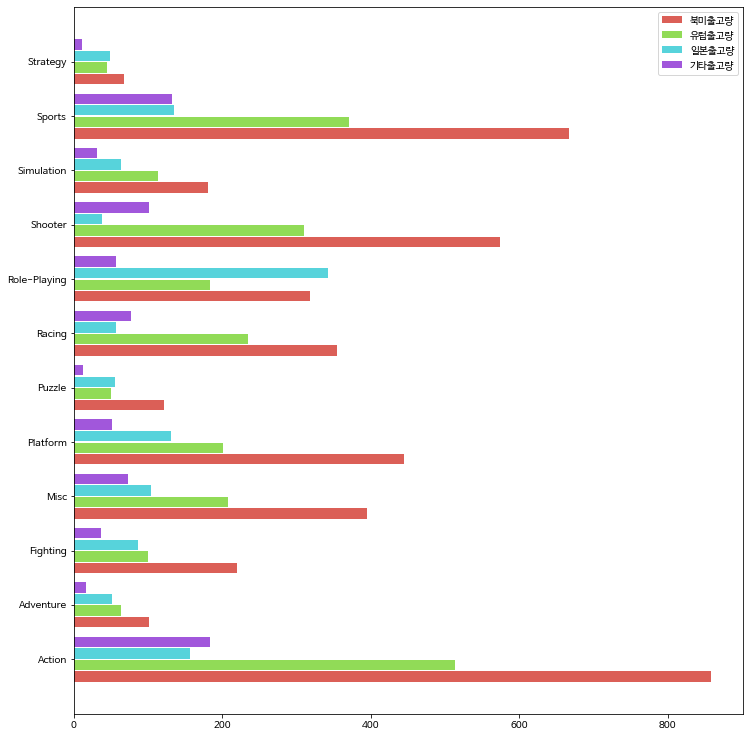

In [29]:
main_category = '장르' ## 메인 카테고리 지정
sub_category = ['북미출고량','유럽출고량','일본출고량','기타출고량'] ## 서브카테고리 지정
 
draw_group_barchart(df_genre_p,main_category,sub_category, fig_width=12, fig_height=13,\
                        bar_type='horizontal', between_bar_padding=0.85,\
                        within_bar_padding=0.9, config_bar = None)

**그래프와 같이 거의 모든 장르의 게임들은 북미출고량이 앞도적으로 많다.**

**시장 규모가 큰 북미 시장을 타겟으로 분석하여 결론을 낼 필요가 있다.**

# **3**-3. 순위 분석

In [30]:
df_rank = df_genre.rank(axis=0, method='max',ascending=False)# 내림차순 랭크 ascending=False

In [31]:
df_rank # 1위부터 12위까지 나올 수 있음을 확인

,북미출고량,유럽출고량,일본출고량,기타출고량
장르,,,,
Action,1.0,1.0,2.0,1.0
Adventure,11.0,10.0,10.0,10.0
Fighting,8.0,9.0,6.0,8.0
Misc,5.0,5.0,5.0,5.0
Platform,4.0,6.0,4.0,7.0
Puzzle,10.0,11.0,9.0,11.0
Racing,6.0,4.0,8.0,4.0
Role-Playing,7.0,7.0,1.0,6.0
Shooter,3.0,3.0,12.0,3.0


In [32]:
df_rank[df_rank <= 3.0]

,북미출고량,유럽출고량,일본출고량,기타출고량
장르,,,,
Action,1.0,1.0,2.0,1.0
Adventure,NaN,NaN,NaN,NaN
Fighting,NaN,NaN,NaN,NaN
Misc,NaN,NaN,NaN,NaN
Platform,NaN,NaN,NaN,NaN
Puzzle,NaN,NaN,NaN,NaN
Racing,NaN,NaN,NaN,NaN
Role-Playing,NaN,NaN,1.0,NaN
Shooter,3.0,3.0,NaN,3.0


**지역별로 출고량의 순위를 3위까지 매기니 위와 같은 결과를 얻었다.**

**일본을 제외한 [북미, 유럽, 기타] 지역의 선호장르는 모두 같다.**

# **4**-1. 연도별 트렌드 분석

In [33]:
df.dtypes

게임제목      object
플랫폼       object
판매연도      object
장르        object
개발사       object
북미출고량    float64
유럽출고량    float64
일본출고량    float64
기타출고량    float64
dtype: object

In [34]:
df.head()

,게임제목,플랫폼,판매연도,장르,개발사,북미출고량,유럽출고량,일본출고량,기타출고량
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [35]:
df.groupby([df.판매연도, df.플랫폼], as_index=True).sum().tail(20)

북미출고량  유럽출고량  일본출고량  기타출고량
판매연도 플랫폼                             
2015 PC     2.20   5.28   0.00   0.55
     PS3    4.76   7.43   3.64   2.35
     PS4   39.76  49.67   5.93  17.50
     PSP    0.00   0.00   0.12   0.00
     PSV    0.54   1.28   4.77   0.48
     Wii    0.57   0.87   0.00   0.12
     WiiU   6.77   4.90   3.41   1.29
     X360   7.11   4.77   0.00   1.14
     XOne  34.29  17.96   0.17   5.23
2016 3DS    0.83   0.57   5.03   0.12
     PC     0.84   1.59   0.00   0.17
     PS3    0.40   0.80   1.13   0.22
     PS4   11.86  17.48   4.23   5.73
     PSV    0.19   0.30   2.72   0.14
     WiiU   1.49   0.99   0.55   0.25
     X360   0.36   0.40   0.00   0.07
     XOne   6.69   4.63   0.01   1.05
2017 PS4    0.00   0.00   0.03   0.00
     PSV    0.00   0.00   0.02   0.00
2020 DS     0.27   0.00   0.00   0.02

# **4**-2. 플랫폼 대분류 컬럼 생성

아타리 : 2600

일렉트로닉 아츠 : 3DO

닌텐도 : 3DS, DS, GB, GBA, GC, N64, NES, NS, SNES, Wii, WiiU

플레이스테이션 : PS, PS2, PS3, PS4, PSP

세가 : DC, GEN, GG, SAT, SCD

마이크로소프트 = PC, X360, XB, XOne

NEC : PCFX, TG16

반다이 : WS

In [36]:
df['플랫폼제조사'] = df['플랫폼']
df_plat = df['플랫폼제조사']

In [37]:
# 아타리
df_plat[df_plat == '2600'] = df_plat[df_plat == '2600'].apply(lambda x : x.replace('2600','아타리'))
# 일렉트로닉아츠
df_plat[df_plat == '3DO'] = df_plat[df_plat == '3DO'].apply(lambda x : x.replace('3DO','일렉트로닉아츠'))
# 닌텐도 3DS DS GB GBA GC N64 NES NS SNES Wii WiiU
df_plat[df_plat == '3DS'] = df_plat[df_plat == '3DS'].apply(lambda x : x.replace('3DS','닌텐도'))
df_plat[df_plat == 'DS'] = df_plat[df_plat == 'DS'].apply(lambda x : x.replace('DS','닌텐도'))
df_plat[df_plat == 'GB'] = df_plat[df_plat == 'GB'].apply(lambda x : x.replace('GB','닌텐도'))
df_plat[df_plat == 'GBA'] = df_plat[df_plat == 'GBA'].apply(lambda x : x.replace('GBA','닌텐도'))
df_plat[df_plat == 'GC'] = df_plat[df_plat == 'GC'].apply(lambda x : x.replace('GC','닌텐도'))
df_plat[df_plat == 'N64'] = df_plat[df_plat == 'N64'].apply(lambda x : x.replace('N64','닌텐도'))
df_plat[df_plat == 'NES'] = df_plat[df_plat == 'NES'].apply(lambda x : x.replace('NES','닌텐도'))
df_plat[df_plat == 'NS'] = df_plat[df_plat == 'NS'].apply(lambda x : x.replace('NS','닌텐도'))
df_plat[df_plat == 'SNES'] = df_plat[df_plat == 'SNES'].apply(lambda x : x.replace('SNES','닌텐도'))
df_plat[df_plat == 'Wii'] = df_plat[df_plat == 'Wii'].apply(lambda x : x.replace('Wii','닌텐도'))
df_plat[df_plat == 'WiiU'] = df_plat[df_plat == 'WiiU'].apply(lambda x : x.replace('WiiU','닌텐도'))
# 플레이스테이션 PS PS2 PS3 PS4 PSP
df_plat[df_plat == 'PS'] = df_plat[df_plat == 'PS'].apply(lambda x : x.replace('PS','플레이스테이션'))
df_plat[df_plat == 'PS2'] = df_plat[df_plat == 'PS2'].apply(lambda x : x.replace('PS2','플레이스테이션'))
df_plat[df_plat == 'PS3'] = df_plat[df_plat == 'PS3'].apply(lambda x : x.replace('PS3','플레이스테이션'))
df_plat[df_plat == 'PS4'] = df_plat[df_plat == 'PS4'].apply(lambda x : x.replace('PS4','플레이스테이션'))
df_plat[df_plat == 'PSP'] = df_plat[df_plat == 'PSP'].apply(lambda x : x.replace('PSP','플레이스테이션'))
df_plat[df_plat == 'PSV'] = df_plat[df_plat == 'PSV'].apply(lambda x : x.replace('PSV','플레이스테이션'))
# 세가 DC GEN GG SAT SCD
df_plat[df_plat == 'DC'] = df_plat[df_plat == 'DC'].apply(lambda x : x.replace('DC','세가'))
df_plat[df_plat == 'GEN'] = df_plat[df_plat == 'GEN'].apply(lambda x : x.replace('GEN','세가'))
df_plat[df_plat == 'GG'] = df_plat[df_plat == 'GG'].apply(lambda x : x.replace('GG','세가'))
df_plat[df_plat == 'SAT'] = df_plat[df_plat == 'SAT'].apply(lambda x : x.replace('SAT','세가'))
df_plat[df_plat == 'SCD'] = df_plat[df_plat == 'SCD'].apply(lambda x : x.replace('SCD','세가'))

# 마이크로소프트 PC X360 XB XOne
df_plat[df_plat == 'PC'] = df_plat[df_plat == 'PC'].apply(lambda x : x.replace('PC','마이크로소프트'))
df_plat[df_plat == 'X360'] = df_plat[df_plat == 'X360'].apply(lambda x : x.replace('X360','마이크로소프트'))
df_plat[df_plat == 'XB'] = df_plat[df_plat == 'XB'].apply(lambda x : x.replace('XB','마이크로소프트'))
df_plat[df_plat == 'XOne'] = df_plat[df_plat == 'XOne'].apply(lambda x : x.replace('XOne','마이크로소프트'))
# NEC PCFX TG16
df_plat[df_plat == 'PCFX'] = df_plat[df_plat == 'PCFX'].apply(lambda x : x.replace('PCFX','NEC'))
df_plat[df_plat == 'TG16'] = df_plat[df_plat == 'TG16'].apply(lambda x : x.replace('TG16','NEC'))

# 반다이 WS
df_plat[df_plat == 'WS'] = df_plat[df_plat == 'WS'].apply(lambda x : x.replace('WS','반다이'))

#SNK
df_plat[df_plat == 'NG'] = df_plat[df_plat == 'NG'].apply(lambda x : x.replace('NG','SNK'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Setti

In [38]:
df['플랫폼제조사'] = df_plat

In [39]:
df.head()

,게임제목,플랫폼,판매연도,장르,개발사,북미출고량,유럽출고량,일본출고량,기타출고량,플랫폼제조사
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,닌텐도
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,닌텐도
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,플레이스테이션
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,닌텐도
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,플레이스테이션


In [40]:
df[df['플랫폼'] == df['플랫폼제조사']] # 전처리 완료

,게임제목,플랫폼,판매연도,장르,개발사,북미출고량,유럽출고량,일본출고량,기타출고량,플랫폼제조사


# **4**-3. 트렌드 시각화

In [117]:
df_plat_year = df.groupby(['판매연도','플랫폼제조사']).sum()

In [118]:
df_total = df_plat_year.sum(axis=1)

In [119]:
df_total.head()

판매연도  플랫폼제조사
1980  아타리       10.88
1981  아타리       35.68
1982  아타리       28.88
1983  닌텐도       10.96
      아타리        5.84
dtype: float64

In [128]:
df_pd_total = pd.DataFrame(df_total,columns=['출고량'])

In [130]:
df_pd_total.head()

출고량
판매연도 플랫폼제조사       
1980 아타리     10.88
1981 아타리     35.68
1982 아타리     28.88
1983 닌텐도     10.96
     아타리      5.84

In [131]:
df_pd_total = df_pd_total.reset_index()

In [132]:
df_pd_total.head()

,판매연도,플랫폼제조사,출고량
0,1980,아타리,10.88
1,1981,아타리,35.68
2,1982,아타리,28.88
3,1983,닌텐도,10.96
4,1983,아타리,5.84


In [133]:
df_pd_total.dtypes

판매연도       object
플랫폼제조사     object
출고량       float64
dtype: object

In [ ]:
pivot_df = df_pd_total.pivot_table(pivot_df, index='판매연도', columns='플랫폼제조사',\
                          values='출고량',\
                          aggfunc='sum')

Text(0, 0.5, '플랫폼제조사')

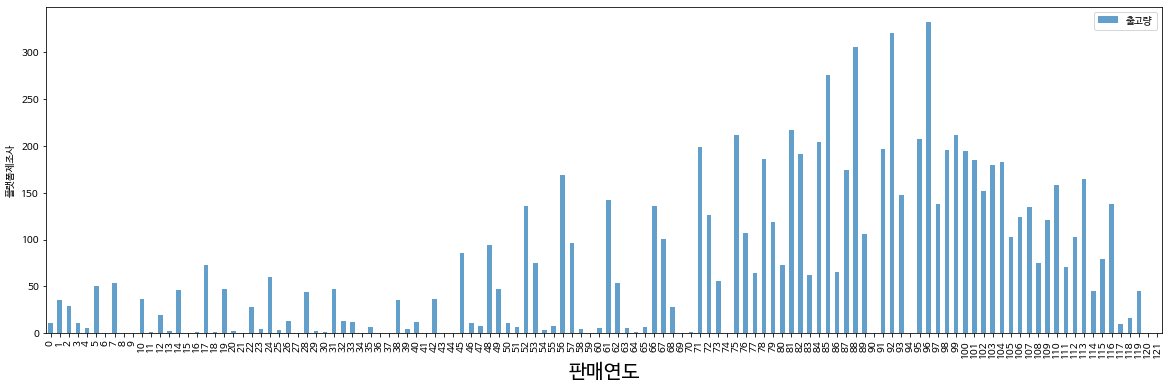

In [140]:
df_pd_total.plot(kind='bar', figsize=(20,6), stacked=True, alpha=0.7)
plt.xlabel('판매연도', size=20)
plt.ylabel('플랫폼제조사')

In [46]:
# df_plat_year = df_plat_year.drop('플랫폼제조사', axis=1)


판매연도       object
플랫폼제조사     object
북미출고량     float64
유럽출고량     float64
일본출고량     float64
기타출고량     float64
dtype: object